In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Company DATA

In [2]:
df = pd.read_csv(r"C:\Users\shiva\Downloads\Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


<Axes: >

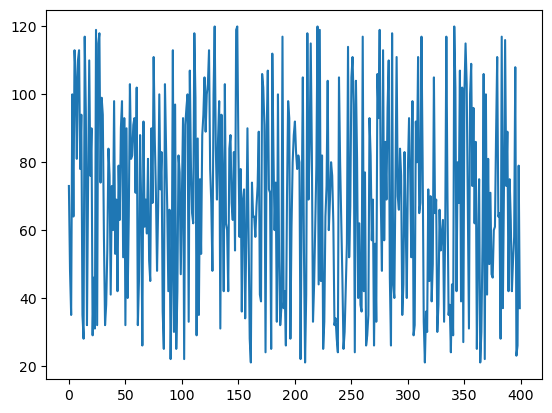

In [3]:
df['Income'].plot()

<Axes: ylabel='Frequency'>

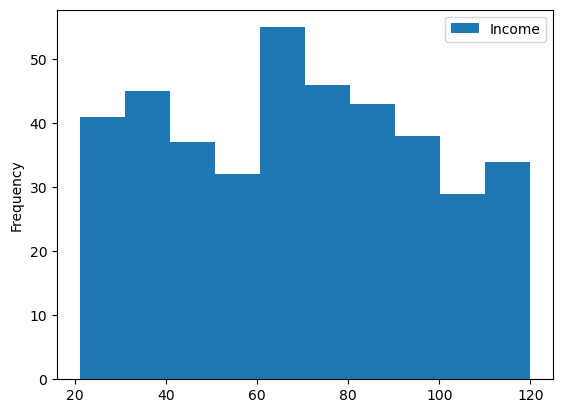

In [4]:
df.plot(kind ='hist',x ='Age', y="Income")

Age
25    60.56
26    59.75
27    67.67
28    56.57
29    77.29
30    68.00
31    64.67
32    82.83
33    68.88
34    73.33
35    76.00
36    81.71
37    73.67
38    66.17
39    64.56
40    86.33
41    68.29
42    68.44
43    63.00
44    65.75
45    68.50
46    77.00
47    64.67
48    61.17
49    67.25
50    72.25
51    71.50
52    84.83
53    60.50
54    62.12
55    68.10
56    56.00
57    51.00
58    77.60
59    50.80
60    68.62
61    80.33
62    72.86
63    82.14
64    75.00
65    60.50
66    77.83
67    73.20
68    89.50
69    69.50
70    57.25
71    72.40
72    84.50
73    64.10
74    58.50
75    88.00
76    67.82
77    59.17
78    82.75
79    54.50
80    57.15
Name: Income, dtype: float64


<Axes: xlabel='Age'>

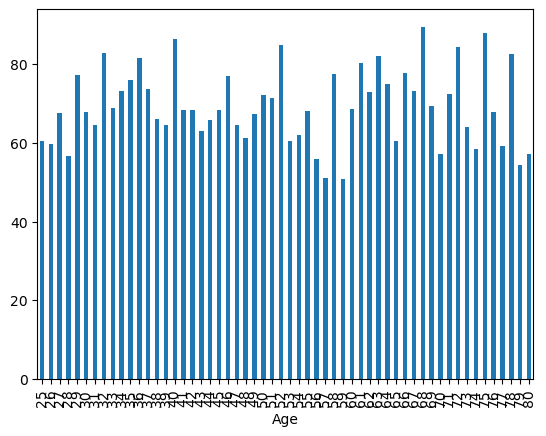

In [5]:
q= round(df.groupby("Age")["Income"].mean(),2)
print(q)
q.plot(kind ='bar')

<Axes: ylabel='Density'>

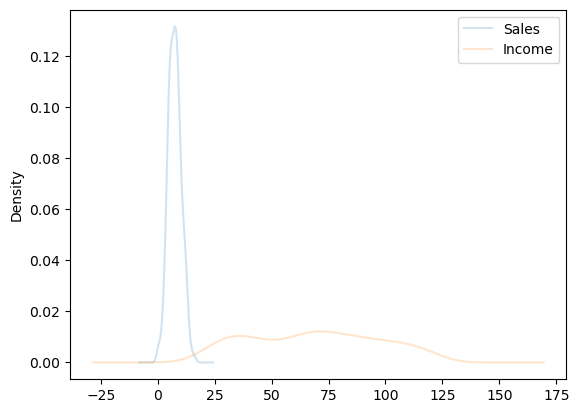

In [6]:
df[['Sales','Income']].plot(kind ='kde',alpha =0.2)

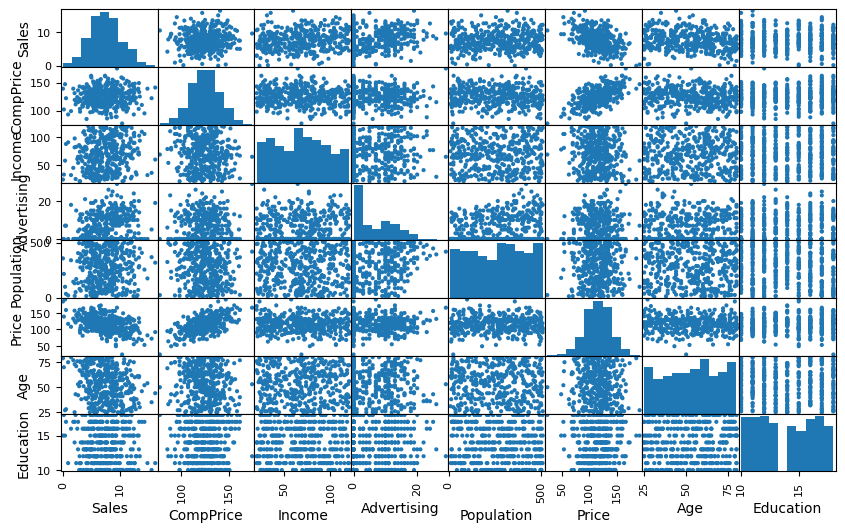

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=1,figsize=(10,6));

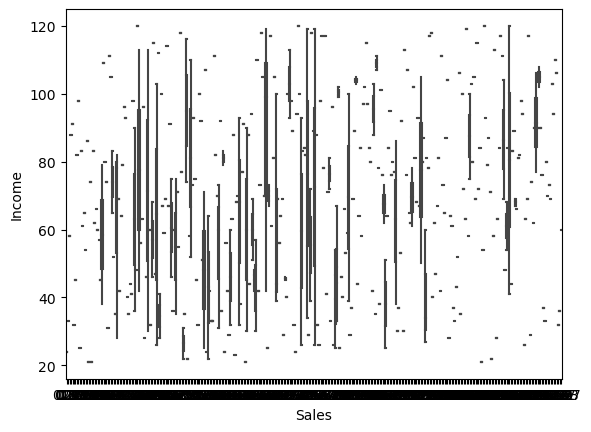

In [8]:
sns.boxplot(x = 'Sales',y = 'Income',data = df)
plt.show()

In [9]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [10]:
df.shape

(400, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [12]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [13]:
df.value_counts()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban  US 
0.00   139        24      0            358         185    Medium     79   15         No     No     1
8.65   123        76      18           218         120    Medium     29   14         No     Yes    1
8.75   143        77      25           448         156    Medium     43   17         Yes    Yes    1
8.74   155        80      0            237         124    Medium     37   14         Yes    No     1
8.73   129        76      16           58          121    Medium     69   12         Yes    Yes    1
                                                                                                  ..
6.01   131        29      11           335         127    Bad        33   12         Yes    Yes    1
5.99   117        42      10           371         121    Bad        26   14         Yes    Yes    1
5.98   124        56      11           447         134    Medium     53   12         No     Yes 

In [14]:
df['Sales']

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [15]:
df['Sales_category'] = pd.cut(df['Sales'],bins=[-np.inf, 8, np.inf] , labels=['Low', 'High'])
df = df.drop('Sales', axis=1)

# converts categorical to numerical data
df = pd.get_dummies(df, columns=['ShelveLoc', 'Urban', 'US'])

X = df.drop('Sales_category', axis=1)
y = df['Sales_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Decision tree model
classifier_DT= DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)

y_pred = classifier_DT.predict(X_test)
y_pred

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test,y_pred)
print('Confusion_matrix:',cm)

cl = classification_report(y_test,y_pred)
print(cl)

# decision tree rules
tree_rules = export_text(classifier_DT, feature_names=list(X.columns))
print(tree_rules)

Accuracy: 0.7625
Confusion_matrix: [[26 11]
 [ 8 35]]
              precision    recall  f1-score   support

        High       0.76      0.70      0.73        37
         Low       0.76      0.81      0.79        43

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80

|--- ShelveLoc_Good <= 0.50
|   |--- Price <= 92.50
|   |   |--- ShelveLoc_Bad <= 0.50
|   |   |   |--- Age <= 64.50
|   |   |   |   |--- class: High
|   |   |   |--- Age >  64.50
|   |   |   |   |--- Population <= 252.50
|   |   |   |   |   |--- Income <= 67.50
|   |   |   |   |   |   |--- class: High
|   |   |   |   |   |--- Income >  67.50
|   |   |   |   |   |   |--- class: Low
|   |   |   |   |--- Population >  252.50
|   |   |   |   |   |--- class: High
|   |   |--- ShelveLoc_Bad >  0.50
|   |   |   |--- Income <= 58.00
|   |   |   |   |--- class: Low
|   |   |   |--- Income >  58.00
|   |   |   |   |--- A

In [16]:
clf_gini= DecisionTreeClassifier(criterion = 'gini',max_depth = 3,random_state=3)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=3)

In [17]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7781
Test set score: 0.7375


[Text(0.5, 0.875, 'x[8] <= 0.5\ngini = 0.479\nsamples = 320\nvalue = [127, 193]'),
 Text(0.25, 0.625, 'x[4] <= 92.5\ngini = 0.43\nsamples = 259\nvalue = [81, 178]'),
 Text(0.125, 0.375, 'x[7] <= 0.5\ngini = 0.426\nsamples = 39\nvalue = [27, 12]'),
 Text(0.0625, 0.125, 'gini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(0.1875, 0.125, 'gini = 0.492\nsamples = 16\nvalue = [7, 9]'),
 Text(0.375, 0.375, 'x[2] <= 6.5\ngini = 0.37\nsamples = 220\nvalue = [54, 166]'),
 Text(0.3125, 0.125, 'gini = 0.216\nsamples = 122\nvalue = [15, 107]'),
 Text(0.4375, 0.125, 'gini = 0.479\nsamples = 98\nvalue = [39, 59]'),
 Text(0.75, 0.625, 'x[4] <= 142.5\ngini = 0.371\nsamples = 61\nvalue = [46, 15]'),
 Text(0.625, 0.375, 'x[1] <= 35.0\ngini = 0.26\nsamples = 52\nvalue = [44, 8]'),
 Text(0.5625, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.6875, 0.125, 'gini = 0.127\nsamples = 44\nvalue = [41, 3]'),
 Text(0.875, 0.375, 'x[6] <= 16.5\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.81

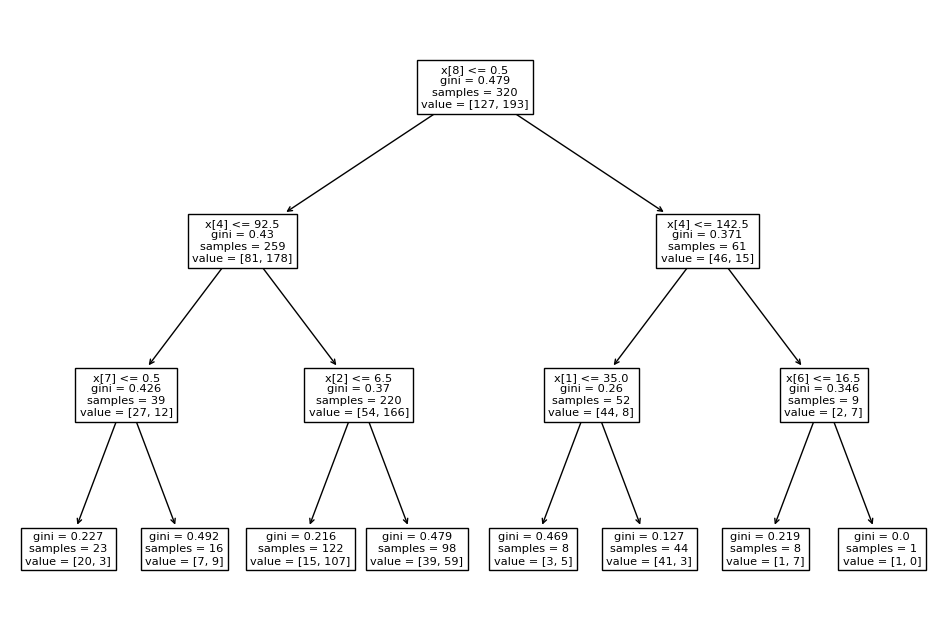

In [18]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

# Fraud data

In [19]:
df1 = pd.read_csv(r"C:\Users\shiva\Downloads\Fraud_check.csv")
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [20]:
df1.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [21]:
df1.shape

(600, 6)

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [23]:
df1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [24]:
df1.value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
NO         Divorced        10329           140885           7                YES      1
YES        Married         21966           117250           20               YES      1
                           26679           79683            26               NO       1
                           26741           176050           20               NO       1
                           26793           162777           7                NO       1
                                                                                     ..
NO         Single          22054           91889            16               NO       1
                           22258           63622            17               NO       1
                           23884           111105           8                YES      1
                           24557           32450            19               YES      1
YES        Single          99619     

In [25]:
df1['Taxable.Income'].value_counts()

Taxable.Income
59689    2
68833    1
60822    1
93090    1
79373    1
        ..
61906    1
31088    1
70365    1
56536    1
96519    1
Name: count, Length: 599, dtype: int64

In [26]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [27]:
df1['Income_Category'] = df1['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')
df1 = df1.drop('Taxable.Income', axis=1)

# converts categorical to numerical.
df1 = pd.get_dummies(df1, columns=['Undergrad', 'Marital.Status', 'Urban' ], drop_first=True)

X = df1.drop('Income_Category', axis=1) 
y = df1['Income_Category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# decision tree model
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred = classifier_DT.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cl = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cl)

# decession tree model
tree_rules = export_text(classifier_DT, feature_names=list(X.columns))
print(tree_rules)

Accuracy: 0.6555555555555556
Confusion Matrix:
 [[110  28]
 [ 34   8]]

Classification Report:
               precision    recall  f1-score   support

        Good       0.76      0.80      0.78       138
       Risky       0.22      0.19      0.21        42

    accuracy                           0.66       180
   macro avg       0.49      0.49      0.49       180
weighted avg       0.64      0.66      0.65       180

|--- Marital.Status_Married <= 0.50
|   |--- Work.Experience <= 23.50
|   |   |--- Work.Experience <= 16.50
|   |   |   |--- City.Population <= 198545.00
|   |   |   |   |--- Work.Experience <= 5.50
|   |   |   |   |   |--- City.Population <= 183477.00
|   |   |   |   |   |   |--- City.Population <= 176182.00
|   |   |   |   |   |   |   |--- City.Population <= 93844.00
|   |   |   |   |   |   |   |   |--- City.Population <= 87875.50
|   |   |   |   |   |   |   |   |   |--- Work.Experience <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- City.Population <= 52533.50
| 

In [28]:
clf_gini= DecisionTreeClassifier(criterion = 'gini',max_depth = 3,random_state=3)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=3)

In [29]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8095
Test set score: 0.7667


[Text(0.5, 0.875, 'x[3] <= 0.5\ngini = 0.314\nsamples = 420\nvalue = [338, 82]'),
 Text(0.25, 0.625, 'x[1] <= 23.5\ngini = 0.289\nsamples = 285\nvalue = [235, 50]'),
 Text(0.125, 0.375, 'x[1] <= 16.5\ngini = 0.317\nsamples = 223\nvalue = [179, 44]'),
 Text(0.0625, 0.125, 'gini = 0.268\nsamples = 169\nvalue = [142, 27]'),
 Text(0.1875, 0.125, 'gini = 0.431\nsamples = 54\nvalue = [37, 17]'),
 Text(0.375, 0.375, 'x[1] <= 28.5\ngini = 0.175\nsamples = 62\nvalue = [56, 6]'),
 Text(0.3125, 0.125, 'gini = 0.045\nsamples = 43\nvalue = [42, 1]'),
 Text(0.4375, 0.125, 'gini = 0.388\nsamples = 19\nvalue = [14, 5]'),
 Text(0.75, 0.625, 'x[0] <= 63322.0\ngini = 0.362\nsamples = 135\nvalue = [103, 32]'),
 Text(0.625, 0.375, 'x[0] <= 48246.5\ngini = 0.219\nsamples = 32\nvalue = [28, 4]'),
 Text(0.5625, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.875, 0.375, 'x[0] <= 65532.0\ngini = 0.396\nsamples = 103\nvalue = [75,

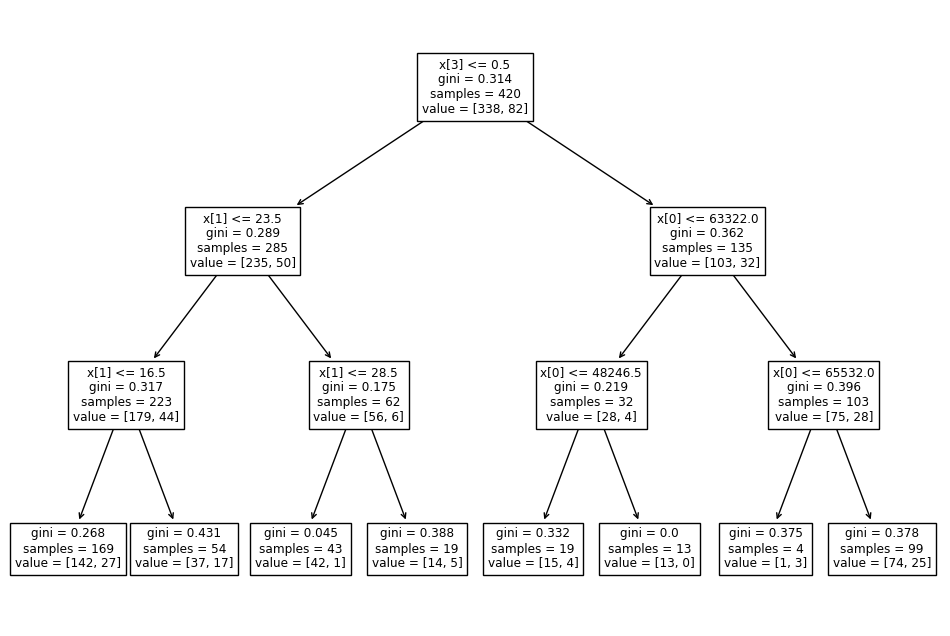

In [30]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 